## BUSINESS UNDERSTANDING

##

Aerodynamics Limited Company, a leader in the aerospace industry, is embarking on a strategic expansion to diversify its portfolio by entering the commercial and private aviation sectors. This move aims to leverage the company's expertise in aerodynamics and engineering to tap into new market opportunities and drive growth.

As part of this expansion, the company faces the critical challenge of identifying the most suitable aircraft that pose the lowest risk for their new business venture. This involves a comprehensive analysis of various aircraft options, considering factors such as safety, operational efficiency, cost-effectiveness, and market demand.

The goal of this project is to conduct thorough research and provide actionable insights that will guide the head of the new aviation division in making informed decisions about aircraft procurement. By selecting the optimal aircraft, Aerodynamics Limited Company aims to ensure a successful entry into the aviation market, minimizing risks and maximizing returns.


# PROBLEM STATEMENT

 Aerodynamics Limited Company is diversifying its portfolio by entering the commercial and private aviation sectors. To successfully launch this new venture, the company needs to identify the aircraft that present the lowest risk. This project aims to conduct thorough research and provide actionable insights to assist the head of the new aviation division in making informed decisions about aircraft procurement.

## DATA UNDERSTANDING

We will be using a database from [NTSB aviation](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) which contains information from 1962 up to 2021 about civil aviation accidents and selected incidents within the United States,its territories and possessions,and in international waters.Firstly,we will begin by understanding the data and identify the relevant columns for the research and drop the irrelavants parts.We will then proceed to analyse the data with an aim of identifying the optimal aircraft.

In [162]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [163]:
import numpy as np
import pandas as pd
import seaborn as sb

In [164]:
#Reading data from the csv file and creating a data frame for it
df=pd.read_csv('AviationData.csv',encoding='ISO-8859-1',low_memory=False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [165]:
#getting an preview of the first 5 lines of the data
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [166]:
#getting an preview of the last 5 lines of the data
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [167]:
#Getting descriptive statistics for the data
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [168]:
#Getting a general summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [169]:
#getting a random sample of the data
df.sample()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
34978,20001206X01317,Accident,LAX94LA208,1994-05-02,"PLEASANT GROVE, CA",United States,NaN,NaN,NaN,NaN,...,Aerial Application,NaN,0.0,0.0,0.0,1.0,VMC,Maneuvering,Probable Cause,14-11-1994


In [170]:
#Setting a specific sample
df.sample(random_state=67)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
6711,20001214X45182,Accident,NYC84LA020,1983-11-03,"WASHINGTON, PA",United States,NaN,NaN,3G2,WASHINGTON CO.,...,Executive/corporate,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,NaN


In [171]:

#Checking number of rows and columns
df.shape

(88889, 31)

## DATA CLEANING

In [172]:
df['Event.Date']=df['Event.Date'].str[:4].astype('int')
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [173]:
#Checking the columns in our data titles
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [174]:
##Step 1: Irrelevant data for the research
# Data Cleaning Action:Dropping columns that are irrelevant.
#Explanation:This data is not required for the research.
df.drop(['Event.Id','Investigation.Type', 'Accident.Number','Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Registration.Number',
          'Make','Amateur.Built','Schedule', 'Purpose.of.flight', 'Total.Minor.Injuries', 'Total.Uninjured','Report.Status', 'Publication.Date'],axis=1,inplace=True)




In [175]:
#Checking the remaining relevant=columns
df.columns

Index(['Event.Date', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Model', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')

The remaining columns are relevant to the research as follows:
*Injury Severity*: Indicates the severity injuries in past events which can highlight potential risk level.
*Aircraft Damage*: Provides information on the extent of damage to the aircraft which can be a risk indicator.
*Aircraft Category*:Different categories may have varying risk profiles.
*Number of Engines*:Can affect the risk in the event of engine failure,
*Engine Type*: Different engine types have different reliability and risk factors.
*FAR Description*:Describes the regulatory framework under which the aircraft operates which can influence risks.
*Total Fatal Injuries*: number of fatal injuries in past events is a direct indicator of risk.
*Total Serious Injuries*: Serious injuries indicate higher risk levels.
*Weather Conditions*:These significantly impact the risk of flight operations,
*Broad phase of flight*:Different phases of flight(take0ff,landing) can influence risk levels.
*Purpose of flight*:The purpose whether commercial or private can influence the risk level.
*Air Carrier*:The specific air carrier's safety record can be a risk factor.


In [176]:
df.head()

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Model,Number.of.Engines,Engine.Type,FAR.Description,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Weather.Condition,Broad.phase.of.flight
0,1948,Fatal(2),Destroyed,NaN,108-3,1.0,Reciprocating,NaN,NaN,2.0,0.0,UNK,Cruise
1,1962,Fatal(4),Destroyed,NaN,PA24-180,1.0,Reciprocating,NaN,NaN,4.0,0.0,UNK,Unknown
2,1974,Fatal(3),Destroyed,NaN,172M,1.0,Reciprocating,NaN,NaN,3.0,NaN,IMC,Cruise
3,1977,Fatal(2),Destroyed,NaN,112,1.0,Reciprocating,NaN,NaN,2.0,0.0,IMC,Cruise
4,1979,Fatal(1),Destroyed,NaN,501,NaN,NaN,NaN,NaN,1.0,2.0,VMC,Approach


In [177]:
#Removing the trailing and leading spaces
df.columns=df.columns.str.strip()

In [178]:
df.head()

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Model,Number.of.Engines,Engine.Type,FAR.Description,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Weather.Condition,Broad.phase.of.flight
0,1948,Fatal(2),Destroyed,NaN,108-3,1.0,Reciprocating,NaN,NaN,2.0,0.0,UNK,Cruise
1,1962,Fatal(4),Destroyed,NaN,PA24-180,1.0,Reciprocating,NaN,NaN,4.0,0.0,UNK,Unknown
2,1974,Fatal(3),Destroyed,NaN,172M,1.0,Reciprocating,NaN,NaN,3.0,NaN,IMC,Cruise
3,1977,Fatal(2),Destroyed,NaN,112,1.0,Reciprocating,NaN,NaN,2.0,0.0,IMC,Cruise
4,1979,Fatal(1),Destroyed,NaN,501,NaN,NaN,NaN,NaN,1.0,2.0,VMC,Approach


In [179]:
#Checking the data types
df.dtypes

Event.Date                  int32
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Model                      object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Weather.Condition          object
Broad.phase.of.flight      object
dtype: object

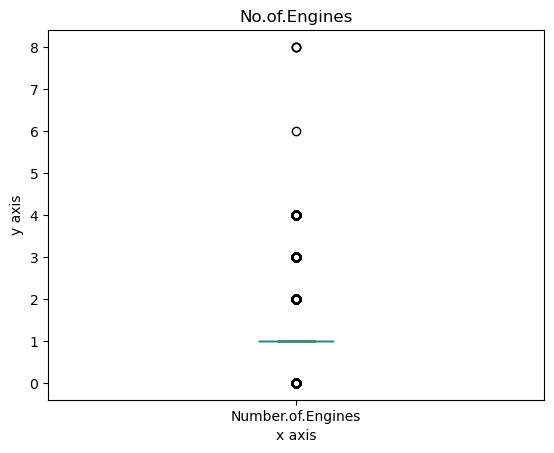

In [180]:
#Checking for outliers using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
df.boxplot(column=['Number.of.Engines'],grid=False)
plt.title('No.of.Engines')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

Conclusion from the plot above is that there is one outlier which we will not drop because it represents a genuine observation that may provide valuable insights.The outlier shows that the number of engines of that specific plane was 8 which is credible as the Boeing b-52 Stratofortress is equipped with 8 engines necessary for thrust and redundancy for remission. 

In [181]:
#Checking for Missing values

df.isnull().sum()

Event.Date                    0
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Model                        92
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

In [182]:
#dropping the missing values
clean_df=df.dropna()
clean_df[:9]

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Model,Number.of.Engines,Engine.Type,FAR.Description,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Weather.Condition,Broad.phase.of.flight
22,1982,Non-Fatal,Substantial,Helicopter,206L-1,1.0,Turbo Shaft,Part 135: Air Taxi & Commuter,"Rocky Mountain Helicopters, In",0.0,0.0,VMC,Approach
33,1982,Fatal(2),Destroyed,Airplane,PA-34-200T,2.0,Reciprocating,Part 135: Air Taxi & Commuter,Lang Air Service,2.0,0.0,VMC,Cruise
39,1982,Fatal(2),Destroyed,Airplane,PA-31,2.0,Reciprocating,Part 135: Air Taxi & Commuter,Empire Airlines,2.0,0.0,VMC,Approach
43,1982,Non-Fatal,Substantial,Airplane,TR182,1.0,Reciprocating,Part 135: Air Taxi & Commuter,Joel Frederick's Monarch Air,0.0,0.0,VMC,Taxi
44,1982,Non-Fatal,Substantial,Airplane,A185F,1.0,Reciprocating,Part 135: Air Taxi & Commuter,Executive Charter Service,0.0,2.0,VMC,Takeoff
51,1982,Fatal(2),Destroyed,Airplane,210,1.0,Reciprocating,Part 135: Air Taxi & Commuter,Robert R. Hylton,2.0,0.0,VMC,Cruise
74,1982,Non-Fatal,Substantial,Airplane,U206,1.0,Reciprocating,Part 135: Air Taxi & Commuter,Tri-city Air Service,0.0,0.0,VMC,Cruise
80,1982,Incident,Minor,Airplane,EMB-110P1,2.0,Turbo Prop,Part 135: Air Taxi & Commuter,Aeromech Incorporated,0.0,0.0,VMC,Taxi
87,1982,Non-Fatal,Substantial,Airplane,PA-31-350,2.0,Reciprocating,Part 135: Air Taxi & Commuter,Richard Engstrom,0.0,0.0,IMC,Approach


In [183]:
#Checking for duplicates
clean_df.duplicated().any()

False

In [184]:
#Capitalizing the column names
clean_df.columns=map(lambda x: str(x).upper(),clean_df.columns)
clean_df.head()

,EVENT.DATE,INJURY.SEVERITY,AIRCRAFT.DAMAGE,AIRCRAFT.CATEGORY,MODEL,NUMBER.OF.ENGINES,ENGINE.TYPE,FAR.DESCRIPTION,AIR.CARRIER,TOTAL.FATAL.INJURIES,TOTAL.SERIOUS.INJURIES,WEATHER.CONDITION,BROAD.PHASE.OF.FLIGHT
22,1982,Non-Fatal,Substantial,Helicopter,206L-1,1.0,Turbo Shaft,Part 135: Air Taxi & Commuter,"Rocky Mountain Helicopters, In",0.0,0.0,VMC,Approach
33,1982,Fatal(2),Destroyed,Airplane,PA-34-200T,2.0,Reciprocating,Part 135: Air Taxi & Commuter,Lang Air Service,2.0,0.0,VMC,Cruise
39,1982,Fatal(2),Destroyed,Airplane,PA-31,2.0,Reciprocating,Part 135: Air Taxi & Commuter,Empire Airlines,2.0,0.0,VMC,Approach
43,1982,Non-Fatal,Substantial,Airplane,TR182,1.0,Reciprocating,Part 135: Air Taxi & Commuter,Joel Frederick's Monarch Air,0.0,0.0,VMC,Taxi
44,1982,Non-Fatal,Substantial,Airplane,A185F,1.0,Reciprocating,Part 135: Air Taxi & Commuter,Executive Charter Service,0.0,2.0,VMC,Takeoff


In [185]:
clean_df.to_csv('Aviation_Analysis.csv')

In [186]:
#Converting the clean data to a csv 
df=pd.read_csv('Aviation_Analysis.csv')

In [187]:
#checking which each aircraft category and the number of fatal injuries
Aircraft=df.groupby(['AIRCRAFT.CATEGORY'])['TOTAL.FATAL.INJURIES'].sum()
Aircraft

AIRCRAFT.CATEGORY
Airplane      111.0
Helicopter     30.0
Name: TOTAL.FATAL.INJURIES, dtype: float64

In [188]:
#checking which aircraft category had the most fatal injuries
Aircraft.sort_values(ascending=False)[0:1]

AIRCRAFT.CATEGORY
Airplane    111.0
Name: TOTAL.FATAL.INJURIES, dtype: float64

In [189]:
#Checking which engine type had the most fatal injuries
Engine_type=df.groupby(['ENGINE.TYPE',])['TOTAL.FATAL.INJURIES'].sum()
Engine_type

ENGINE.TYPE
Reciprocating    66.0
Turbo Fan        29.0
Turbo Jet         0.0
Turbo Prop       16.0
Turbo Shaft      30.0
Name: TOTAL.FATAL.INJURIES, dtype: float64

# Univariate Analysis

For the univariate analysis ,we analyse the total fatal injuries over the years.

In [190]:
df.columns

Index(['Unnamed: 0', 'EVENT.DATE', 'INJURY.SEVERITY', 'AIRCRAFT.DAMAGE',
       'AIRCRAFT.CATEGORY', 'MODEL', 'NUMBER.OF.ENGINES', 'ENGINE.TYPE',
       'FAR.DESCRIPTION', 'AIR.CARRIER', 'TOTAL.FATAL.INJURIES',
       'TOTAL.SERIOUS.INJURIES', 'WEATHER.CONDITION', 'BROAD.PHASE.OF.FLIGHT'],
      dtype='object')

In [194]:
Fatal_Injuries_over_time=df.groupby(['EVENT.DATE'])['TOTAL.FATAL.INJURIES'].sum()
Fatal_Injuries_over_time

EVENT.DATE
1982    88.0
1992    27.0
1993     0.0
2001     6.0
2002     2.0
2004    13.0
2005     1.0
2007     4.0
Name: TOTAL.FATAL.INJURIES, dtype: float64

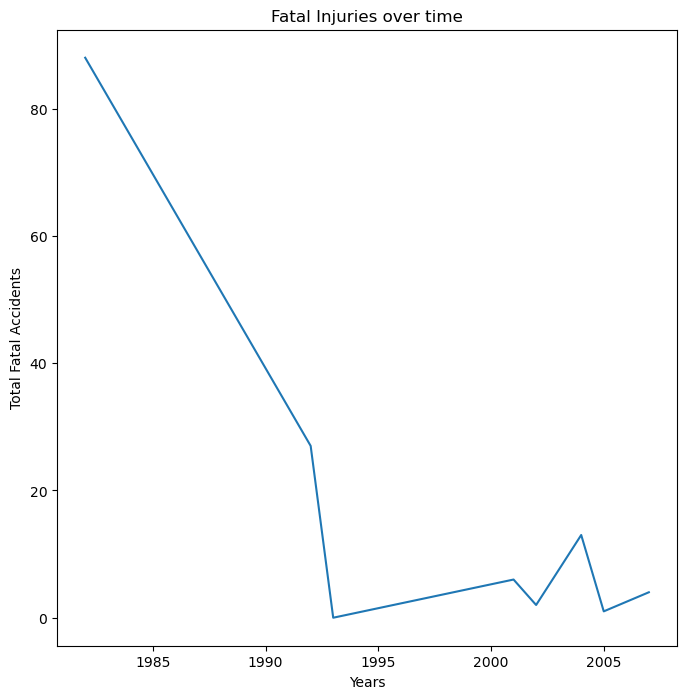

In [204]:
fig,ax=plt.subplots(figsize=(8,8))
ax.plot(Fatal_Injuries_over_time.index.tolist(),Fatal_Injuries_over_time.tolist());
ax.set_xlabel('Years')
ax.set_ylabel("Total Fatal Accidents")
ax.set_title('Fatal Injuries over time');   

From the plot above it is evident that accident fatalities reduced significantly over time.
Recommendation 1:It is therefore recommendeded to proceed with the investment as it is worthwhile due to the decline of fatalities over the years.

# Bivariate Analysis

In [208]:
Model_VS_Injuries=df.groupby(['MODEL'])['TOTAL.FATAL.INJURIES'].sum().sort_values()
Model_VS_Injuries

MODEL
100              0.0
PA-23 250        0.0
PA-23            0.0
L-1011           0.0
H-18             0.0
                ... 
206B             8.0
DHC-2            8.0
PA-31           10.0
Jetstream 32    13.0
28-4000         27.0
Name: TOTAL.FATAL.INJURIES, Length: 138, dtype: float64

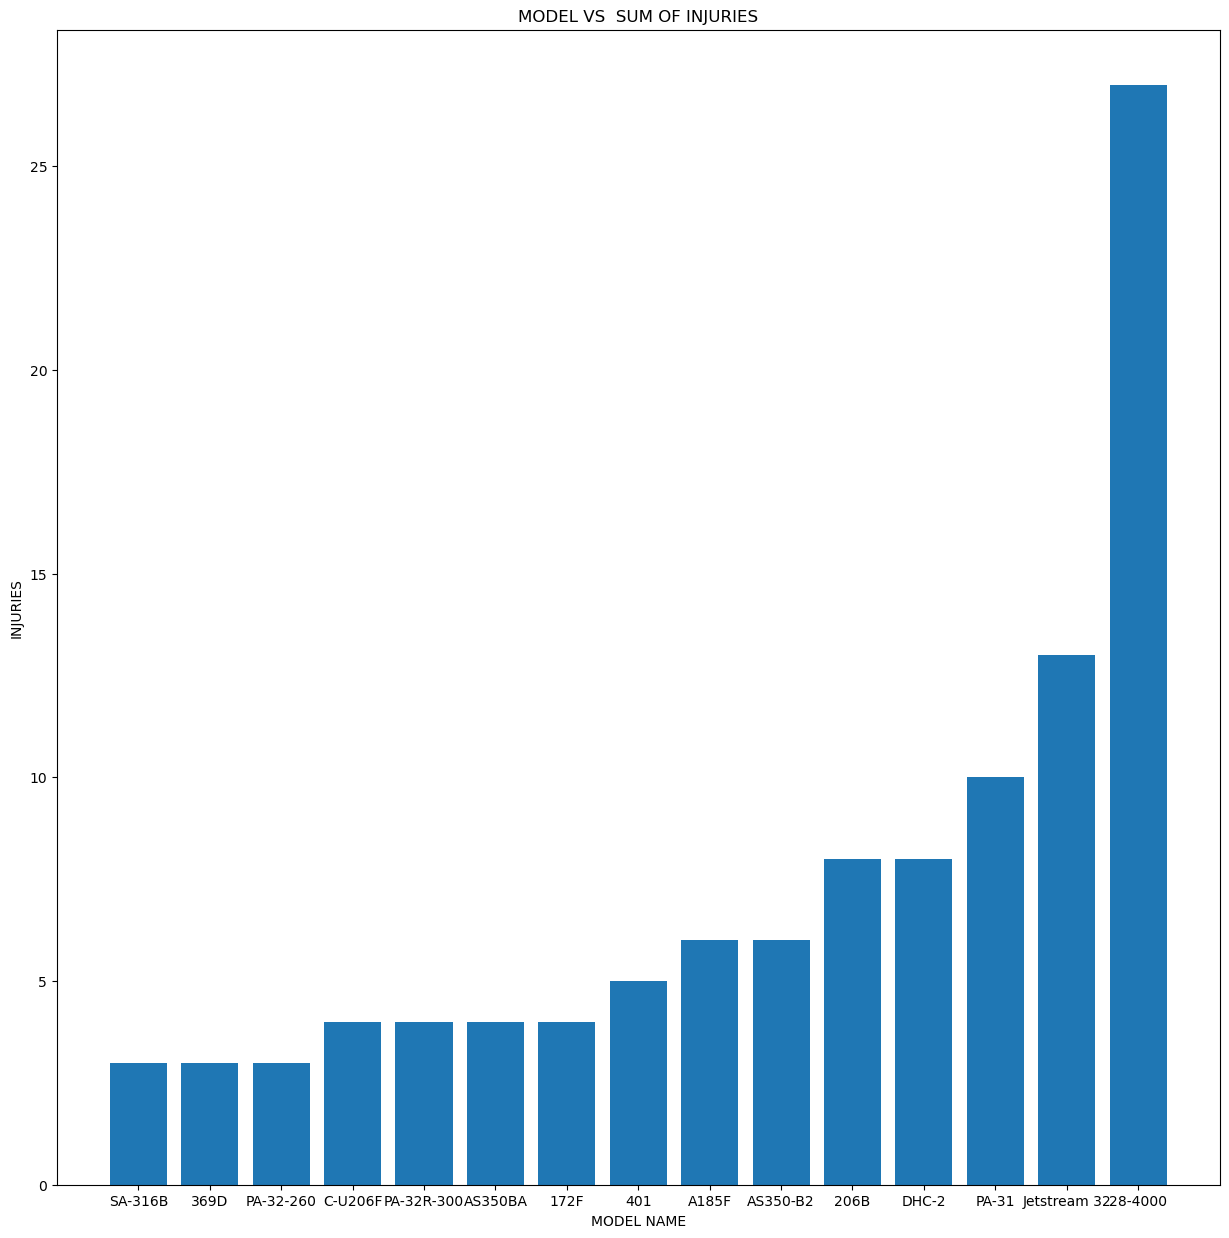

In [219]:
fig,ax=plt.subplots(figsize=(15,15))
ax.bar(Model_VS_Injuries.index.tolist()[-15:],Model_VS_Injuries.tolist()[-15:]);
ax.set_xlabel('MODEL NAME')
ax.set_ylabel("INJURIES")
ax.set_title('MODEL VS  SUM OF INJURIES'); 

From the plot above those specific models are seen to have had the most fatal injuries overall.These are therefore the highlighted as the most risky aircraft models that should not be purchased at all.
Recommendation 2:When purchasing the aircrafts,the following models are a no go zone due to the number of fatal injuries.

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 100000x1e+06 with 0 Axes>

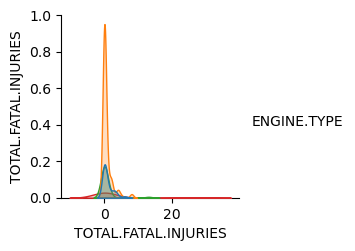

In [226]:
Figure=plt.figure(figsize=(1000,10000))
sb.pairplot(df[[ 'ENGINE.TYPE', 'TOTAL.FATAL.INJURIES', 'WEATHER.CONDITION']].dropna(), hue='ENGINE.TYPE')
plt.show()